In [1]:
import librosa
import sys
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
from glob import glob
from scipy.io import wavfile
import pandas as pd

In [2]:
data_dir ='./all_sounds/'
sound_dir = glob(data_dir + '/*.wav' )
length_of_files= len(sound_dir)



In [3]:
ending_time = []
for i in range(length_of_files):
    filename = sound_dir[i]
    Fs = 44100
    clip, sample_rate = librosa.load(filename, sr=Fs)
    n_fft = 1024 
    start = 0 
    hop_length=512
    X = librosa.stft(clip, n_fft=n_fft, hop_length=hop_length)
    t_samples = np.arange(clip.shape[0]) / Fs
    ending_time.append(t_samples[-1])
    
ending_time
    

[8.999977324263039, 8.999977324263039]

In [4]:
mean_frequency = []

def freq(file, start_time, end_time):
    sample_rate, data = wavfile.read(file)
    start_point = int(sample_rate * start_time)
    end_point = int(sample_rate * end_time )
    length = (end_time - start_time)
    counter = 0
    for i in range(start_point, end_point):
        if data[i] < 0 and data[i+1] > 0:
            counter += 1
    return counter/length
for i in range(length_of_files):
    y=freq(sound_dir[i], 0 ,ending_time[i])
    mean_frequency.append(y)
mean_frequency

[2173.7832546819213, 5589.569638623428]

In [5]:
df = pd.read_csv('yho.csv')

In [6]:
df

,Timestamp,audio,SI
0,8/16/2021 19:56:35,https://drive.google.com/open?id=1PDbYc_c3K-Ab...,Yes
1,8/18/2021 18:36:24,https://drive.google.com/open?id=1xdLMzu4-uX10...,No


In [7]:
df['Frequency'] = mean_frequency

In [8]:
df

,Timestamp,audio,SI,Frequency
0,8/16/2021 19:56:35,https://drive.google.com/open?id=1PDbYc_c3K-Ab...,Yes,2173.783255
1,8/18/2021 18:36:24,https://drive.google.com/open?id=1xdLMzu4-uX10...,No,5589.569639


In [9]:
df_freq=df['Frequency']
df_si=df['SI']

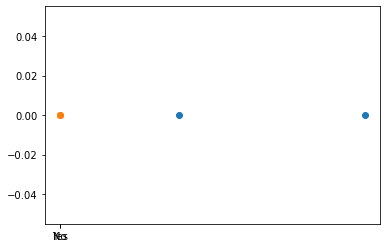

In [10]:
plt.plot(df['Frequency'],np.zeros_like(df['Frequency']),'o')
plt.plot(df['SI'],np.zeros_like(df['SI']),'o')
plt.show()
plt.di